In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('./data/datasets/cleaned_data.csv')

df.head()

,Subreddit,Tokens
0,24hoursupport,"['like', 'helping', 'come', 'hang', 'new', 'di..."
1,24hoursupport,"['acer', 'laptop', 'corrupt', 'windows', 'turn..."
2,24hoursupport,"['downloaded', 'trojan', 'file', 'window', 'de..."
3,24hoursupport,"['help', 'accessed', 'smart', 'remote', 'butto..."
4,24hoursupport,"['problem', 'network', 'adapter', 'i’m', 'havi..."


## Visualize Word Count (CountVectorizer)

In [21]:
vect = CountVectorizer()
vect.fit(df['Tokens'])

# Create DTM
dtm = vect.transform(df['Tokens'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

most_common_words = pd.DataFrame(dtm.sum().sort_values(ascending=False))

most_common_words.reset_index(inplace=True)  # Resetting the index to replace column names

most_common_words.columns = ['word', 'count']

most_common_words.head()

,word,count
0,im,850
1,like,848
2,know,662
3,time,655
4,dont,566


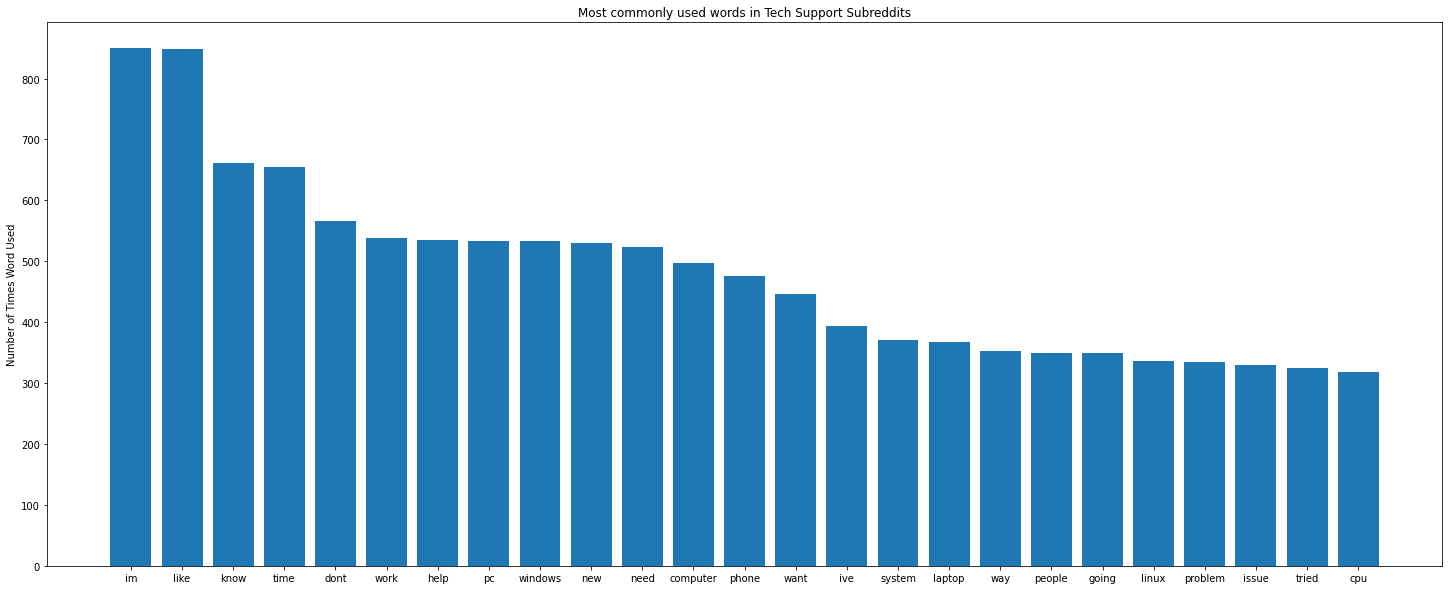

In [27]:
import matplotlib.pyplot as plt

# Visualize for better understanding
rcParams['figure.figsize'] = 25, 10

ten_most_common_words = most_common_words.head(25)  # The 10 most common words

plt.bar(x=ten_most_common_words['word'], height=ten_most_common_words['count'])
plt.ylabel('Number of Times Word Used')
plt.title('Most commonly used words in Tech Support Subreddits')
plt.show();

# Few more stop words to add here: ['im', 'like', 'know', 'dont', 'ive']

## Visualize Word Frequency (TF-IDF Vectorizer)

In [28]:
vect = TfidfVectorizer()
vect.fit(df['Tokens'])

# Create DTM
dtm = vect.transform(df['Tokens'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

most_common_words = pd.DataFrame(dtm.sum().sort_values(ascending=False))

most_common_words.reset_index(inplace=True)  # Resetting the index to replace column names

most_common_words.columns = ['word', 'count']

most_common_words.head()

,word,count
0,im,30.697509
1,pc,26.850268
2,like,26.245425
3,know,23.898246
4,help,23.467995


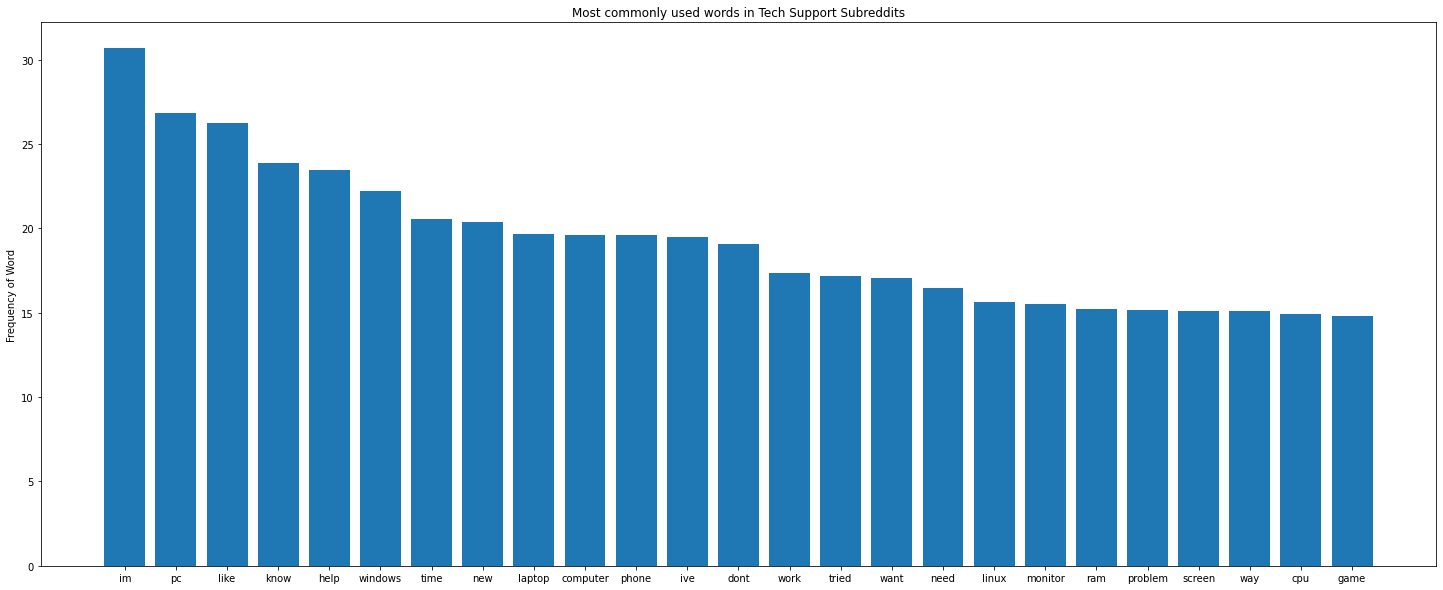

In [29]:

ten_most_common_words = most_common_words.head(25)  # The 10 most common words

plt.bar(x=ten_most_common_words['word'], height=ten_most_common_words['count'])
plt.ylabel('Frequency of Word')
plt.title('Most commonly used words in Tech Support Subreddits')
plt.show();

# Few more stop words to add here: ['im', 'like', 'know', 'dont', 'ive']